# Text-extraction

### Installing and importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev
!pip install textract

In [3]:
from google.colab.patches import cv2_imshow
import cv2
import textract

### Start

read image

In [151]:
image = cv2.imread('/content/WhatsApp Image 2021-02-27 at 21.50.33 (1).jpeg')
image_cp = image.copy()

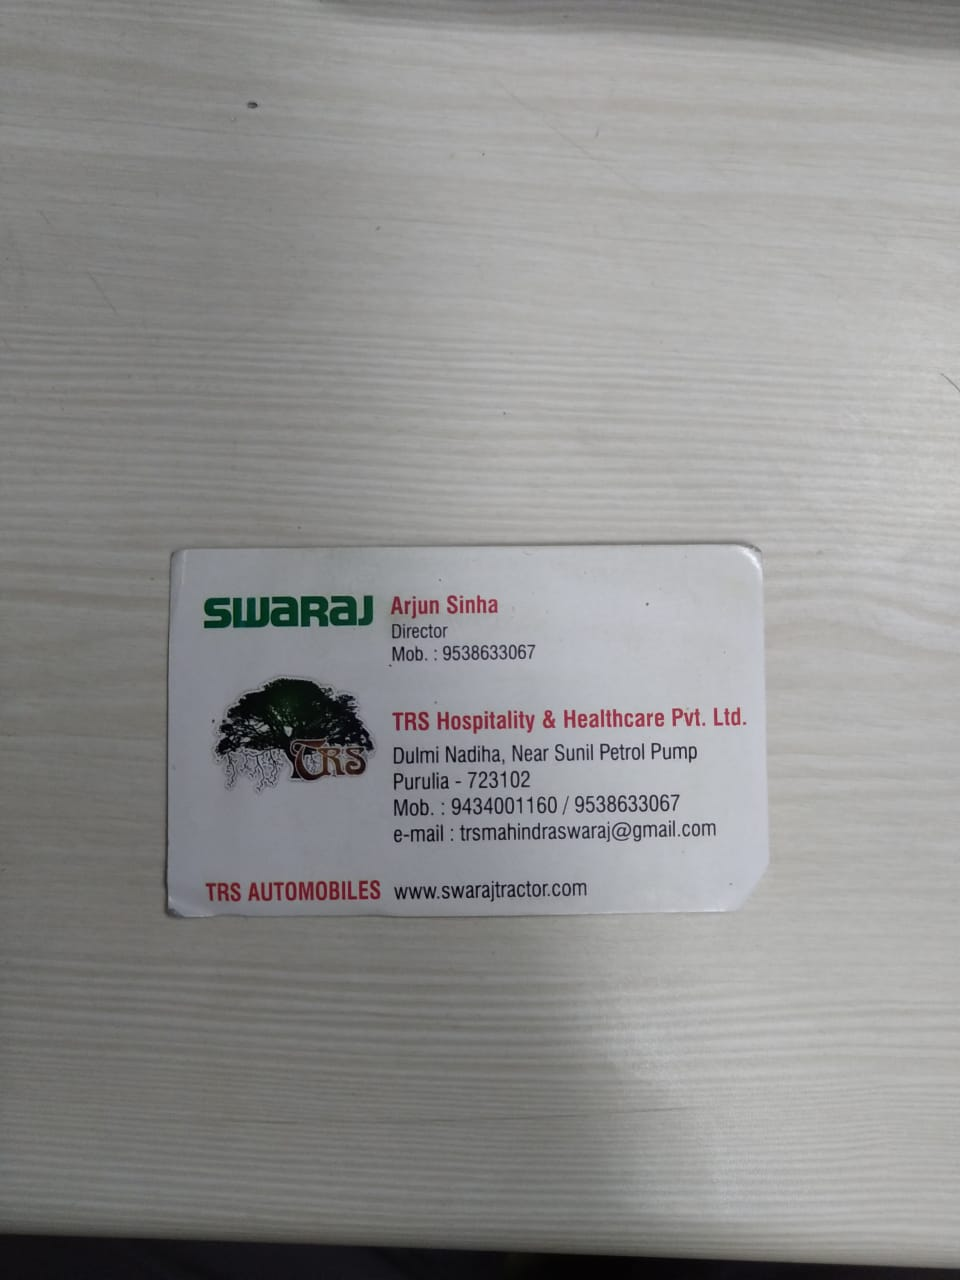

In [152]:
cv2_imshow(image_cp)

Detect contour and crop along the edge

In [159]:
wi, hi, ci = image_cp.shape
if wi<1000:
  image_cp = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

gray=cv2.cvtColor(image_cp,cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(image_cp, 10, 250) 

#applying closing function
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)) 
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
for c in cnts: 
  x,y,w,h = cv2.boundingRect(c)
  if w>int(wi/ci) and h>int(hi/ci):
    new_img=image_cp[y:y+h,x:x+w]

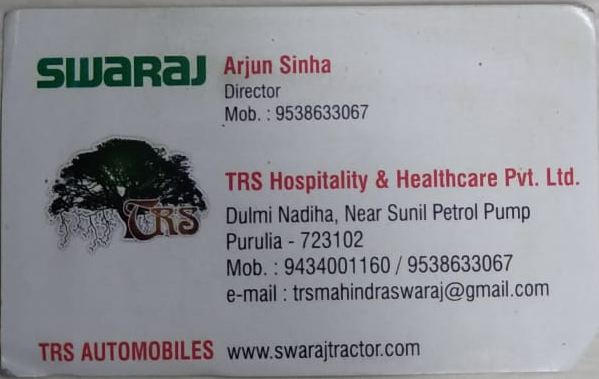

In [160]:
cv2_imshow(new_img)

Binary image

In [161]:
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
doit = (gray > otsu).astype("uint8") * 255
# show the scanned image and save one copy in out folder
cv2.imwrite('/content/letsee.PNG', doit)

True

Extract text with textract and refine the text

In [162]:
text = str(textract.process('/content/letsee.PNG', lang='eng'))

text=text[1:]
text = ''.join(text.split("'"))
text = ' '.join(text.split("\\n"))
text = ''.join(text.split("\\x"))

In [163]:
print(text)

SwaRal Arjun Sinha  Director c3a2e282accb9cMob. : 9538633067  TRS Hospitality & Healihcare Pvt. Ltd Duimi Nadiha, Near Sunil Petrol Pump Purulia - 723102  Mob. : 9434001160 / 9538633067  e-mail : trsmahindraswaraj@gmail.com     TRS AUTOMOBILES www.swarajtractor.com    0c
